![Duke AIPI Logo](https://storage.googleapis.com/aipi_datasets/Duke-AIPI-Logo.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Missing values & cleanup


In [ ]:
name_df = pd.read_csv('name.augmented.csv.gz', compression='gzip')
title_df = pd.read_csv('title.augmented.csv.gz', compression='gzip')

/var/folders/gb/rw_zzymx6_l9fjjn469mb7kr0000gn/T/ipykernel_2956/1996581683.py:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  title_df = pd.read_csv('title.augmented.csv.gz', compression='gzip')


In [4]:
name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13971396 entries, 0 to 13971395
Data columns (total 22 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Unnamed: 0.1                       int64  
 1   Unnamed: 0                         int64  
 2   nconst                             object 
 3   primaryName                        object 
 4   birthYear                          object 
 5   deathYear                          object 
 6   primaryProfession                  object 
 7   knownForTitles                     object 
 8   averageRating_actor                float64
 9   averageRating_actress              float64
 10  averageRating_archive_footage      float64
 11  averageRating_archive_sound        float64
 12  averageRating_casting_director     float64
 13  averageRating_cinematographer      float64
 14  averageRating_composer             float64
 15  averageRating_director             float64
 16  averageRating_ed

In [5]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11261935 entries, 0 to 11261934
Data columns (total 26 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Unnamed: 0.1                       int64  
 1   Unnamed: 0                         int64  
 2   tconst                             object 
 3   titleType                          object 
 4   primaryTitle                       object 
 5   originalTitle                      object 
 6   isAdult                            object 
 7   startYear                          object 
 8   endYear                            object 
 9   runtimeMinutes                     object 
 10  genres                             object 
 11  averageRating                      float64
 12  averageRating_actor                float64
 13  averageRating_actress              float64
 14  averageRating_archive_footage      float64
 15  averageRating_archive_sound        float64
 16  averageRating_ca

In [12]:
title_df.aggregate('count')

Unnamed: 0.1                         11261935
Unnamed: 0                           11261935
tconst                               11261935
titleType                            11261935
primaryTitle                         11261916
originalTitle                        11261916
isAdult                              11261935
startYear                            11261935
endYear                              11261935
runtimeMinutes                       11261935
genres                               11261302
averageRating                         1503482
averageRating_actor                   7382908
averageRating_actress                 6011902
averageRating_archive_footage         2770563
averageRating_archive_sound            417388
averageRating_casting_director        1103832
averageRating_cinematographer         2709888
averageRating_composer                2598446
averageRating_director                5457874
averageRating_editor                  3270111
averageRating_producer            

In [7]:
title_df.aggregate('count')/len(title_df)

Unnamed: 0.1                         1.000000
Unnamed: 0                           1.000000
tconst                               1.000000
titleType                            1.000000
primaryTitle                         0.999998
originalTitle                        0.999998
isAdult                              1.000000
startYear                            1.000000
endYear                              1.000000
runtimeMinutes                       1.000000
genres                               0.999944
averageRating                        0.133501
averageRating_actor                  0.655563
averageRating_actress                0.533825
averageRating_archive_footage        0.246011
averageRating_archive_sound          0.037062
averageRating_casting_director       0.098014
averageRating_cinematographer        0.240624
averageRating_composer               0.230728
averageRating_director               0.484630
averageRating_editor                 0.290368
averageRating_producer            

In [8]:
title_df['genres'].unique()

array(['Documentary,Short', 'Animation,Short', 'Animation,Comedy,Romance',
       ..., 'Biography,Crime,Music', 'Mystery,Reality-TV,Thriller',
       'Musical,Reality-TV,Talk-Show'], dtype=object)

In [11]:
title_df['top_genre'] = title_df['genres'].str.split(',').str[0].str.strip()
title_df['top_genre'].unique()

array(['Documentary', 'Animation', 'Comedy', 'Short', 'Romance', 'News',
       'Drama', 'Fantasy', 'Horror', 'Biography', 'Music', 'Crime',
       'Family', 'Adventure', 'Action', 'History', '\\N', 'Mystery',
       'Musical', 'War', 'Sci-Fi', 'Western', 'Thriller', 'Sport',
       'Film-Noir', 'Talk-Show', 'Game-Show', 'Adult', 'Reality-TV', nan],
      dtype=object)

In [14]:
filtered_title_df = title_df[title_df[['top_genre', 'averageRating', 'averageRating_principal', 'averageRating_director', 'averageRating_producer', 'averageRating_actor', 'averageRating_actress', 'averageRating_writer', 'averageRating_cinematographer', 'averageRating_composer', 'averageRating_editor', 'averageRating_production_designer']].notnull().all(axis=1)]
filtered_title_df.aggregate('count')

Unnamed: 0.1                         289726
Unnamed: 0                           289726
tconst                               289726
titleType                            289726
primaryTitle                         289726
originalTitle                        289726
isAdult                              289726
startYear                            289726
endYear                              289726
runtimeMinutes                       289726
genres                               289726
averageRating                        289726
averageRating_actor                  289726
averageRating_actress                289726
averageRating_archive_footage        181073
averageRating_archive_sound           34218
averageRating_casting_director       192618
averageRating_cinematographer        289726
averageRating_composer               289726
averageRating_director               289726
averageRating_editor                 289726
averageRating_producer               289726
averageRating_production_designe


### Sampling


In [23]:
balanced_title_df = pd.DataFrame()

unique_genres = filtered_title_df['top_genre'].unique()

samples_per_genre = 1000 // len(unique_genres)

for genre in unique_genres:
    filtered_title_df_by_genre = filtered_title_df[filtered_title_df['top_genre'] == genre]
    filtered_title_df_by_genre = filtered_title_df_by_genre.copy()
    filtered_title_df_by_genre['startYear_casted_as_string'] = filtered_title_df_by_genre['startYear'].apply(lambda x: str(x))
    filtered_title_df_by_genre = filtered_title_df_by_genre.sort_values(by='startYear_casted_as_string')
    num_titles = len(filtered_title_df_by_genre)
    interval = num_titles // samples_per_genre
    if interval != 0:
        filtered_sampled_title_df_by_genre = filtered_title_df_by_genre.iloc[::interval]
        filtered_sampled_title_df_by_genre.drop('startYear_casted_as_string', axis=1)
        balanced_title_df = pd.concat([balanced_title_df, filtered_sampled_title_df_by_genre])

balanced_title_df.reset_index(drop=True, inplace=True)

balanced_title_df

Unnamed: 0.1  Unnamed: 0      tconst  titleType  \
0              244         244   tt0000247      short   
1            49004       49004   tt0049905      movie   
2            68089       68089   tt0069502    tvMovie   
3           159716      159716   tt0165232      movie   
4          2352887     2352887   tt1251138  tvEpisode   
...            ...         ...         ...        ...   
1040       1602507     1602507  tt11143116  tvEpisode   
1041       1853080     1853080  tt11597370  tvEpisode   
1042       2525330     2525330  tt12844690  tvEpisode   
1043       2846052     2846052  tt13439164  tvEpisode   
1044       6289358     6289358  tt26491407  tvEpisode   

                                       primaryTitle  \
0                                         King John   
1                                    Men and Wolves   
2                                         Jail Bait   
3                                     The Last Hero   
4                                      Episode #1.3   
...                                             ...   
1040                               Friends and Foes   
1041                                   Episode #2.5   
1042                                  Episode #22.7   
1043  Group A Playoffs - So You Think You Can Mask?   
1044                       Welcome to the Challenge   

                                      originalTitle isAdult startYear endYear  \
0                                         King John       0      1899      \N   
1                                     Uomini e lupi       0      1957      \N   
2                                       Wildwechsel       0      1972      \N   
3                                     Yogoreta eiyû       0      1982      \N   
4                                      Episode #1.3       0      1988      \N   
...                                             ...     ...       ...     ...   
1040                               Friends and Foes       0      2019      \N   
1041                                   Episode #2.5       0      2020      \N   
1042                                  Episode #22.7       0      2020      \N   
1043  Group A Playoffs - So You Think You Can Mask?       0      2021      \N   
1044                       Welcome to the Challenge       0      2023      \N   

     runtimeMinutes  ... averageRating_composer  averageRating_director  \
0                 5  ...               5.506373                5.062042   
1                94  ...               6.180374                6.491176   
2               102  ...               6.811881                6.481935   
3               112  ...               6.400000                5.987500   
4                \N  ...               7.174063                7.047941   
...             ...  ...                    ...                     ...   
1040             40  ...               8.562500                8.484211   
1041             58  ...               7.850000                7.048496   
1042             \N  ...               7.053929                5.369449   
1043             42  ...               5.900000                6.519524   
1044             45  ...               7.216921                7.066667   

      averageRating_editor  averageRating_producer  \
0                 4.400000                5.212069   
1                 5.424138                5.968056   
2                 6.788931                6.368571   
3                 6.297059                6.241667   
4                 7.264815                7.441667   
...                    ...                     ...   
1040              6.786962                8.062131   
1041              6.997917                7.225990   
1042              6.895337                6.987048   
1043              6.742469                6.668278   
1044              7.342414                6.675303   

      averageRating_production_designer  averageRating_self  \
0                              4.900000            5.100000   
1          

In [24]:
balanced_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       1045 non-null   int64  
 1   Unnamed: 0                         1045 non-null   int64  
 2   tconst                             1045 non-null   object 
 3   titleType                          1045 non-null   object 
 4   primaryTitle                       1045 non-null   object 
 5   originalTitle                      1045 non-null   object 
 6   isAdult                            1045 non-null   object 
 7   startYear                          1045 non-null   object 
 8   endYear                            1045 non-null   object 
 9   runtimeMinutes                     1045 non-null   object 
 10  genres                             1045 non-null   object 
 11  averageRating                      1045 non-null   float

In [26]:
balanced_title_df.groupby('top_genre').aggregate({ 'tconst': 'count' })

tconst
top_genre          
Action           35
Adult            35
Adventure        35
Animation        35
Biography        35
Comedy           35
Crime            35
Documentary      35
Drama            35
Family           35
Fantasy          35
Game-Show        35
History          36
Horror           35
Music            35
Musical          35
Mystery          35
News             39
Reality-TV       35
Romance          35
Sci-Fi           35
Short            35
Sport            63
Talk-Show        50
Thriller         35
War              50
Western          37
\N               35


### Distributions


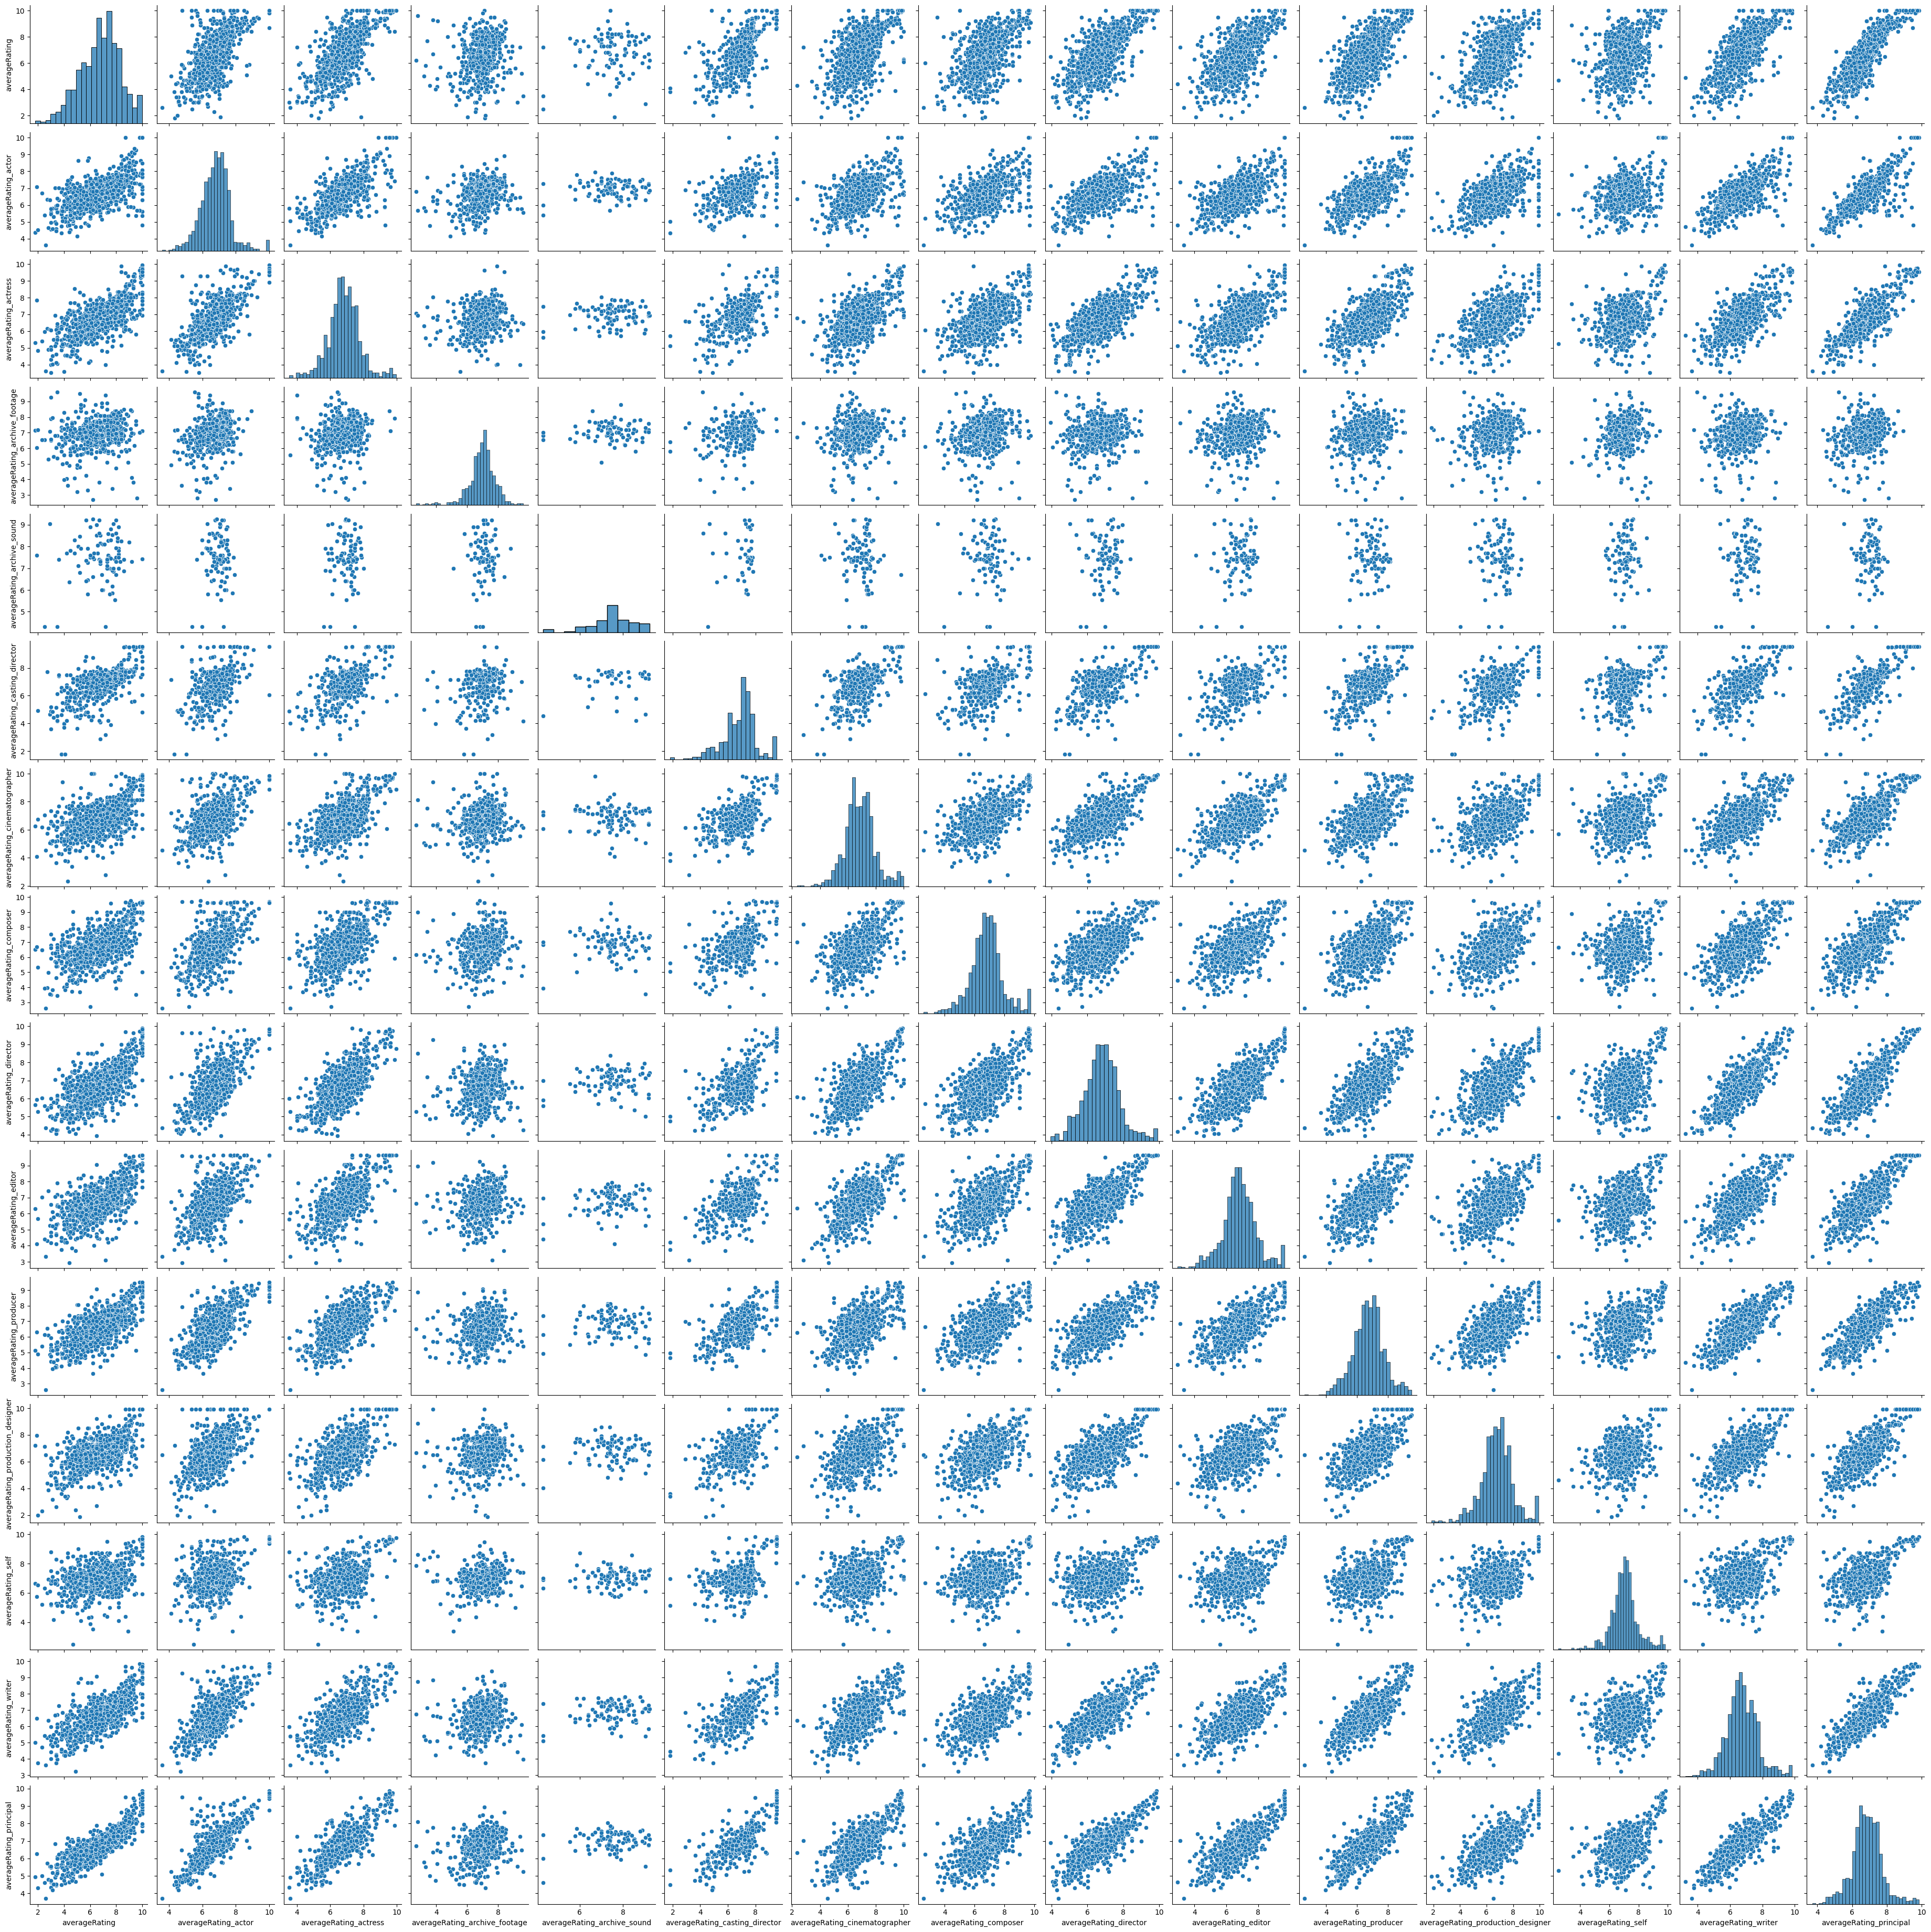

In [29]:
numeric_df = balanced_title_df.select_dtypes(include=['float64', 'int64'])
numeric_df = numeric_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
sns.pairplot(numeric_df)
plt.show()


### Correlations

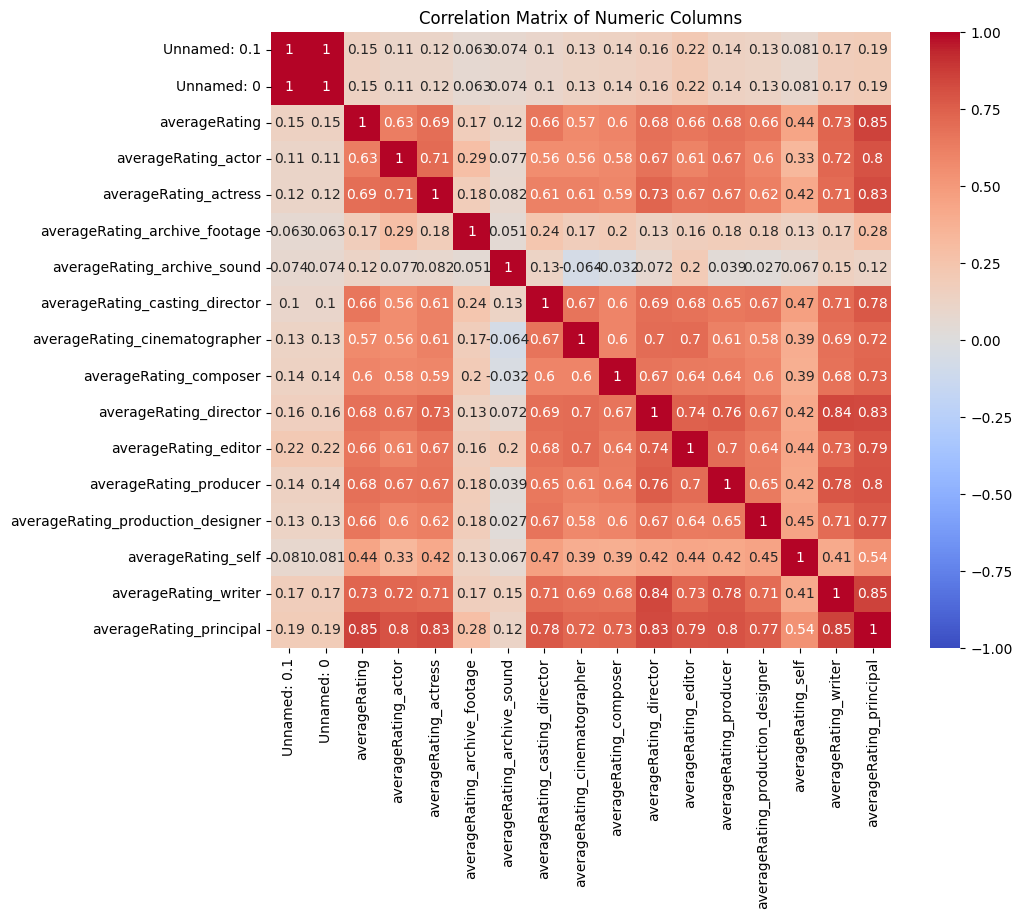

In [ ]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()